# 1.1. MVC Pattern

### **`MVC`** ?

- **M**odel - **V**iew - **C**ontoller
    - **M**odel: 서비스의 데이터 작업 및 처리 관련 (주로 DB)
    - **V**iew: UI 와 같은 사용자 인터페이스 (주로 화면)
    - **C**ontroller: Model 과 View 를 제어하는 중개자 역할 (제어 코드)
<br>
<br>
- **MVC** 패턴을 활용하여 아키텍처를 구성하면 기능 확장 및 유지 보수 시에 독립적으로 개발이 가능하며, 서로 간의 영향도와 의존성을 최소화할 수 있다.

- 반면, **MVC** 패턴은 하나의 기능 구현이 여러 파일로 나뉘어져 있어 코드의 이해 및 디버깅에 난이도가 있다.
<br>
<br>
- 코드 수정 시, 특정 부분만 독립적으로 유지보수하기보다는 전체 코드를 수정해야 하는 경우가 더 많을 수 있다.

# 1.2. AB Test

- 사용자 접속 시마다 서비스되는 기능들을 다르게 구현하여, 각 기능별 사용자 피드백을 기반으로 빠르게 개발 및 개선해나가는 실험적인 개발 기법이다.

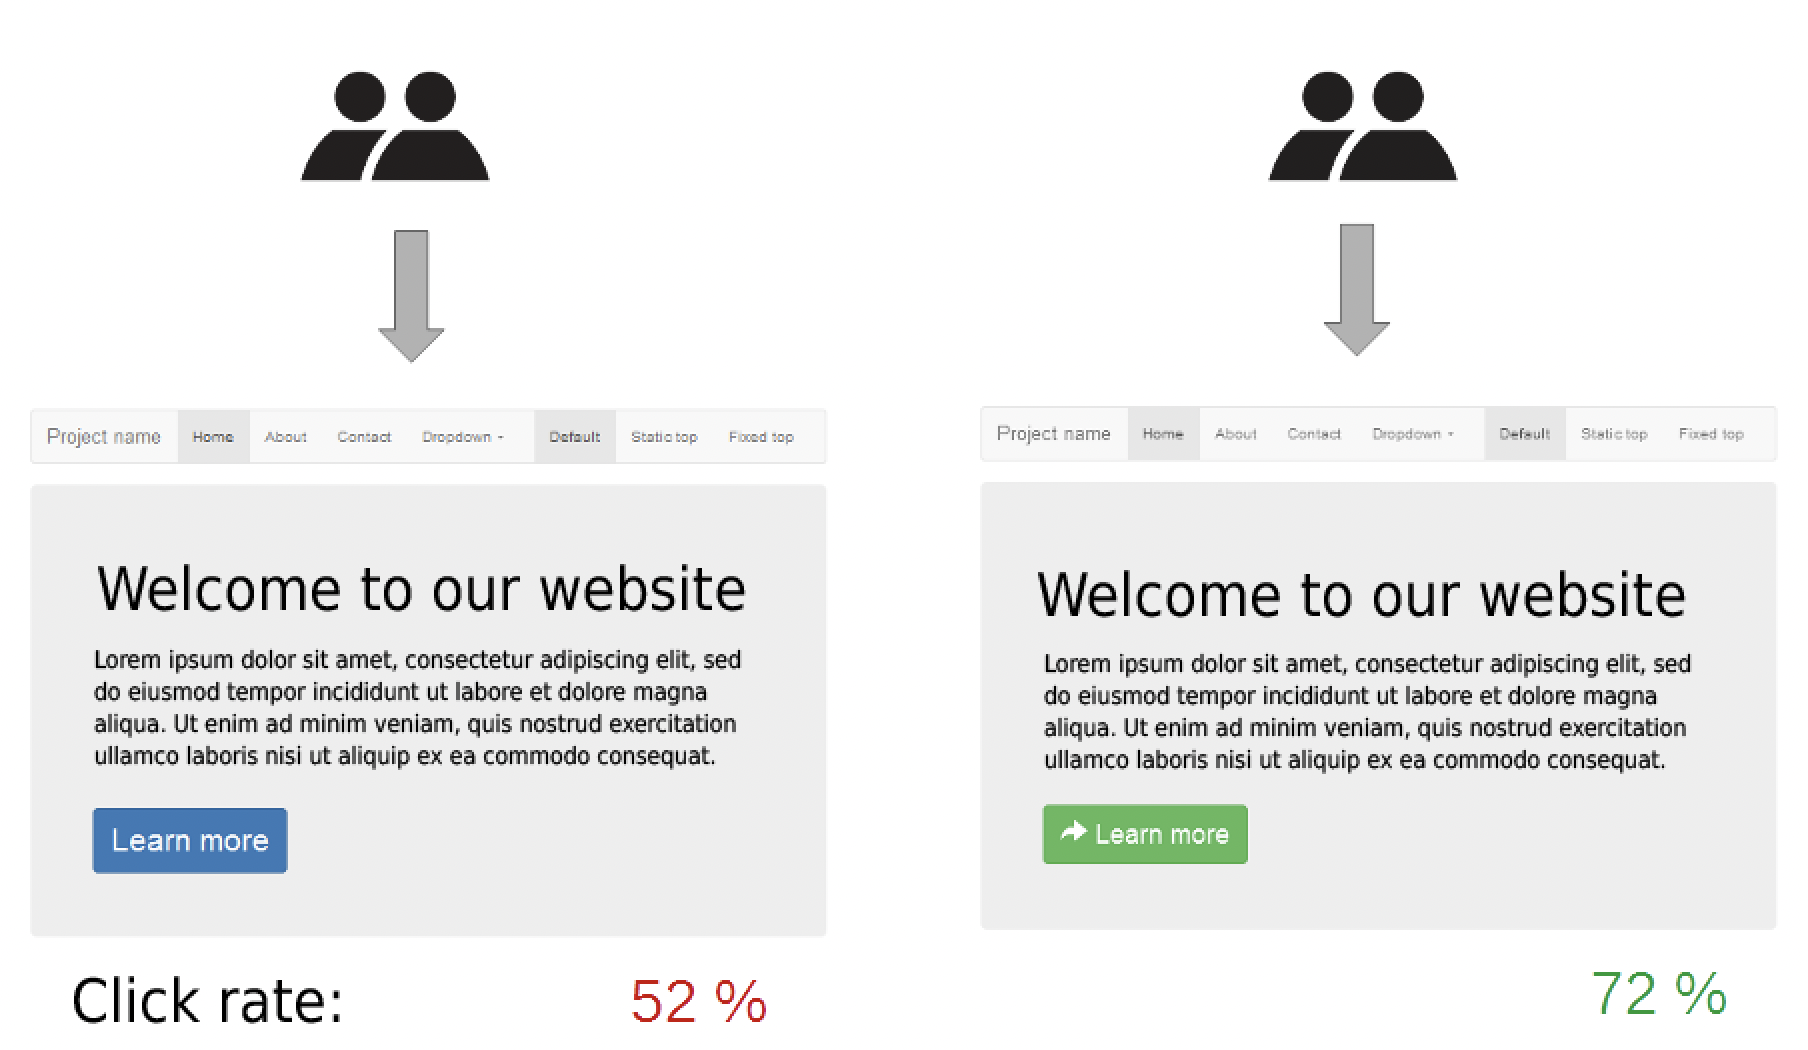

# 1.3. MVC in Flask

### **`Flask blueprint`**

- 한 모듈에 모든 코드를 작성하면 복잡도가 상승하며 그에 따라 관리가 어려워진다.
- 따라서, 기능 별로 폴더 및 파일을 분리하고, **blueprint** 를 통해 기능 별 추가 및 제거가 용이하도록 구성할 수 있다.

### **`module_a.py`**

In [ ]:
from flask import Blueprint

blog_abtest = Blueprint('blogs', __name__)

# http://localhost:8080/blogs/blog1
@blog_abtest.route('/blog1')
def blog1():
    return "blog1"

# http://localhost:8080/blogs/blog2
@blog_abtest.route('/blog2')
def blog2():
    return "blog2"

- **blueprint** 는 기본적으로 위와 같이 작성하며, blog_abtest 는 **blueprint 객체** 가 된다.
- **blueprint 객체** 에는 여러 라우팅 경로가 포함된다.

### **`main.py`**

In [ ]:
from flask import Flask
from folder import module_a

app = Flask(__name__)
app.register_blueprint(module_a.blog_abtest, url_prefix='/blogs')

- **`register_blueprint`** 를 활용하여 다른 모듈에서 생성된 **blueprint 객체** 를 **app** 에 등록할 수 있다.
<br>
<br>
- 이 때, **`url_prefix`** 는 **base_path** 를 설정하는 파라미터이다.
    - **URL/base_path/{routes}**
<br>
<br>
- **blueprint 객체** 에 포함되는 모든 라우팅 경로는 기본적으로 **URL/base_path/** 로 시작한다.